In [63]:
# import zipfile
# with zipfile.ZipFile('Ad-click-data.zip', 'r') as zip_ref:
#     zip_ref.extractall('dataset')
# zip_ref.close()

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Data Description
================================================================
    This data set contains the following features:

    1. VistID: The id for the user visit on website
    2. Time_Spent: Average time spent by user on site in minutes
    3. Age: User age in years
    4. Area_Income: Average Income of geographical area of user
    5. Internet_Usage: Average minutes a day user spent on the internet
    6. Ad_Topic: Headline of the advertisement
    7. Country_Name: Country of user
    8. City_Code: City of user
    9. Male: Whether or not user was male
    10. Time_Period: Time at which consumer clicked on Ad
    11. Weekday: Name of the day
    12. Month: Name of the months
    13. Year: Which year the data is collected
    14. licked: 0 means not clicked and 1 means that user clicked the Ad.

In [2]:

df = pd.read_csv('dataset/Ad click data.csv')

In [3]:
df = df.drop_duplicates()

In [4]:
df.head()

VistID  Time_Spent  Age  Avg_Income  Internet_Usage    Ad_Topic  \
0  5183153       87.97   43    55901.12          185.46  product_11   
1  4023265       51.63   50    39132.00          176.73   product_8   
2  4708083       82.37   38    57032.36          210.60   product_6   
3  9771815       62.06   45    48868.00          190.05  product_19   
4  6451317       77.66   31    61608.23          204.86  product_11   

               Country_Name City_code Male Time_Period   Weekday    Month  \
0                    Serbia    City_5   No   Mid-Night  Thursday     July   
1              Turkmenistan    City_1   No     Evening  Saturday     June   
2  Northern Mariana Islands    City_2   No     Morning   Tuesday  January   
3              South Africa    City_3  Yes     Morning  Thursday    April   
4                Guadeloupe    City_2   No        Noon  Thursday  January   

   Year  Clicked  
0  2020        0  
1  2020        1  
2  2020        0  
3  2020        1  
4  2020        0

Basic data exploration
=====================
    1. balanced dataset
    2. no null values
    3. droped columns are [VistID, Country_Name, Year]
    4. City_code cloumn tell us the Tire of the city in its country. And total 9 city types are available 
    * Time_Spent: continuous
    * Age: continuous
    * Avg_Income : continuous
    * Internet_Usage : continuous
    * Ad_Topic : Categorical
    * City_code	Male :Categorical
    * Time_Period: categorical
    * Weekday: categorical
    * Month : categorical
    * Clicked : categorical (Target variable)
    

In [5]:
df = df.drop(columns=['VistID', 'Country_Name', 'Year'])

In [6]:
df.head()

Time_Spent  Age  Avg_Income  Internet_Usage    Ad_Topic City_code Male  \
0       87.97   43    55901.12          185.46  product_11    City_5   No   
1       51.63   50    39132.00          176.73   product_8    City_1   No   
2       82.37   38    57032.36          210.60   product_6    City_2   No   
3       62.06   45    48868.00          190.05  product_19    City_3  Yes   
4       77.66   31    61608.23          204.86  product_11    City_2   No   

  Time_Period   Weekday    Month  Clicked  
0   Mid-Night  Thursday     July        0  
1     Evening  Saturday     June        1  
2     Morning   Tuesday  January        0  
3     Morning  Thursday    April        1  
4        Noon  Thursday  January        0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6657 entries, 0 to 6656
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Time_Spent      6657 non-null   float64
 1   Age             6657 non-null   int64  
 2   Avg_Income      6657 non-null   float64
 3   Internet_Usage  6657 non-null   float64
 4   Ad_Topic        6657 non-null   object 
 5   City_code       6657 non-null   object 
 6   Male            6657 non-null   object 
 7   Time_Period     6657 non-null   object 
 8   Weekday         6657 non-null   object 
 9   Month           6657 non-null   object 
 10  Clicked         6657 non-null   int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 624.1+ KB


In [8]:
df.describe()

Time_Spent          Age    Avg_Income  Internet_Usage      Clicked
count  6657.000000  6657.000000   6657.000000     6657.000000  6657.000000
mean     66.849548    37.258825  55930.486743      184.947684     0.456362
std      15.509672    10.995458  13110.339257       43.189896     0.498129
min      32.600000    19.000000  13996.500000      104.780000     0.000000
25%      55.200000    28.000000  48454.000000      145.730000     0.000000
50%      70.660000    36.000000  58183.000000      193.580000     0.000000
75%      79.570000    46.000000  65957.000000      222.260000     1.000000
max      91.430000    61.000000  79484.800000      269.960000     1.000000

In [9]:
df.nunique()

Time_Spent         900
Age                 43
Avg_Income        1487
Internet_Usage     966
Ad_Topic            30
City_code            9
Male                 2
Time_Period          6
Weekday              7
Month                7
Clicked              2
dtype: int64

<Axes: xlabel='City_code'>

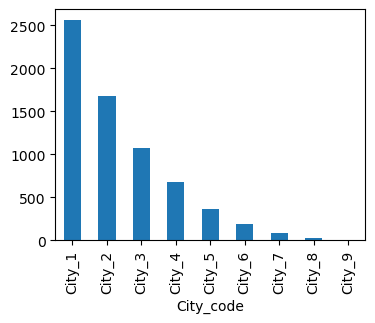

In [10]:
df.groupby('City_code').size().plot(kind='bar', figsize=(4,3))

<Axes: xlabel='Clicked'>

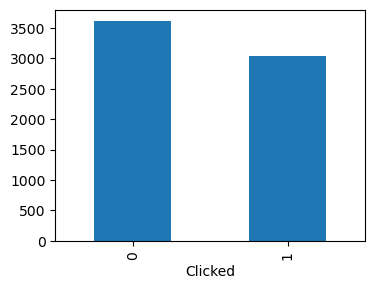

In [11]:
grouped_class = df.groupby('Clicked').size()
grouped_class.plot(kind= 'bar', figsize= (4,3))

<Axes: xlabel='Time_Period'>

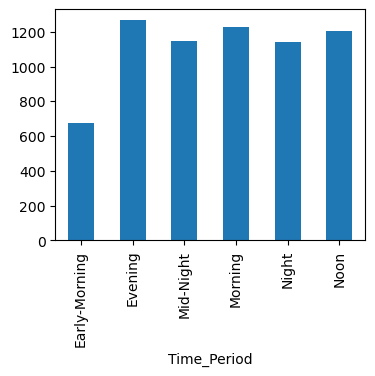

In [12]:
grouped_time_period = df.groupby('Time_Period').size()
grouped_time_period.plot(kind= 'bar', figsize= (4,3))

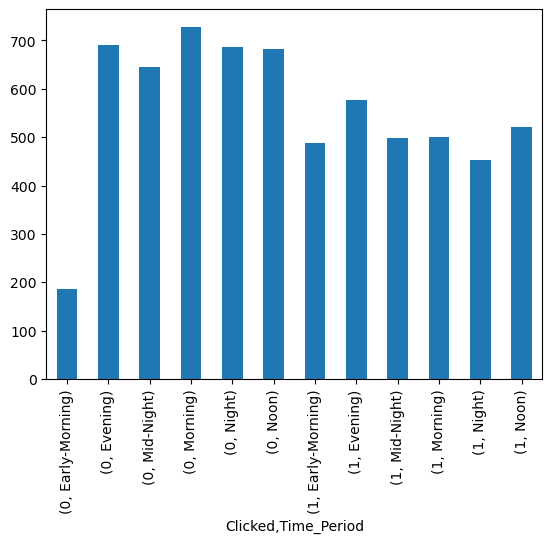

In [13]:
grouped_clicked_Timeperiod = df.groupby(['Clicked', 'Time_Period']).size().plot(kind='bar')

array([[<Axes: title={'center': 'Avg_Income'}>]], dtype=object)

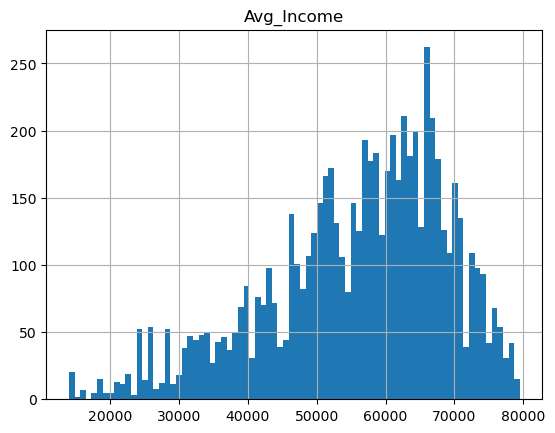

In [14]:
df.hist(column= 'Avg_Income',bins=80)

Visual Exploratory Data Analysis for data distribution
========================================================
    In this data, all the categorical columns have satisfactory distribution for machine learning.

    Selected Categorical Variables: All the categorical variables are selected for further analysis.

    "Ad_Topic","City_code", "Male", "Time_Period", "Weekday","Month"

    Selected Continuous Variables:

    Time_Spent : Selected.
    Age: Selected.
    Avg_Income: Selected. Slightly negative skewed distribution, acceptable.
    Internet_Usage: Selected.



In [15]:
def plotcategorical(input_data, categorical_columns):
    """
    plot the distribution of the all the categorical variables

    Parameters input_data: dataframe
    parameters categorical_columns: list of column names
    """
    %matplotlib inline
    # generate mutliple subplots    
    fig, subplot = plt.subplots(nrows = 2, ncols = len(categorical_columns)//2, figsize = (30,15))
    fig.suptitle(f"bar plot of categorical {str(categorical_columns)} columns")
    for i, column in zip(range(len(categorical_columns)), categorical_columns):
        count, i = (0, i) if i < len(categorical_columns)//2 else (1 , i-len(categorical_columns)//2)
        input_data.groupby(column).size().plot(kind = 'bar', ax = subplot[count][i])



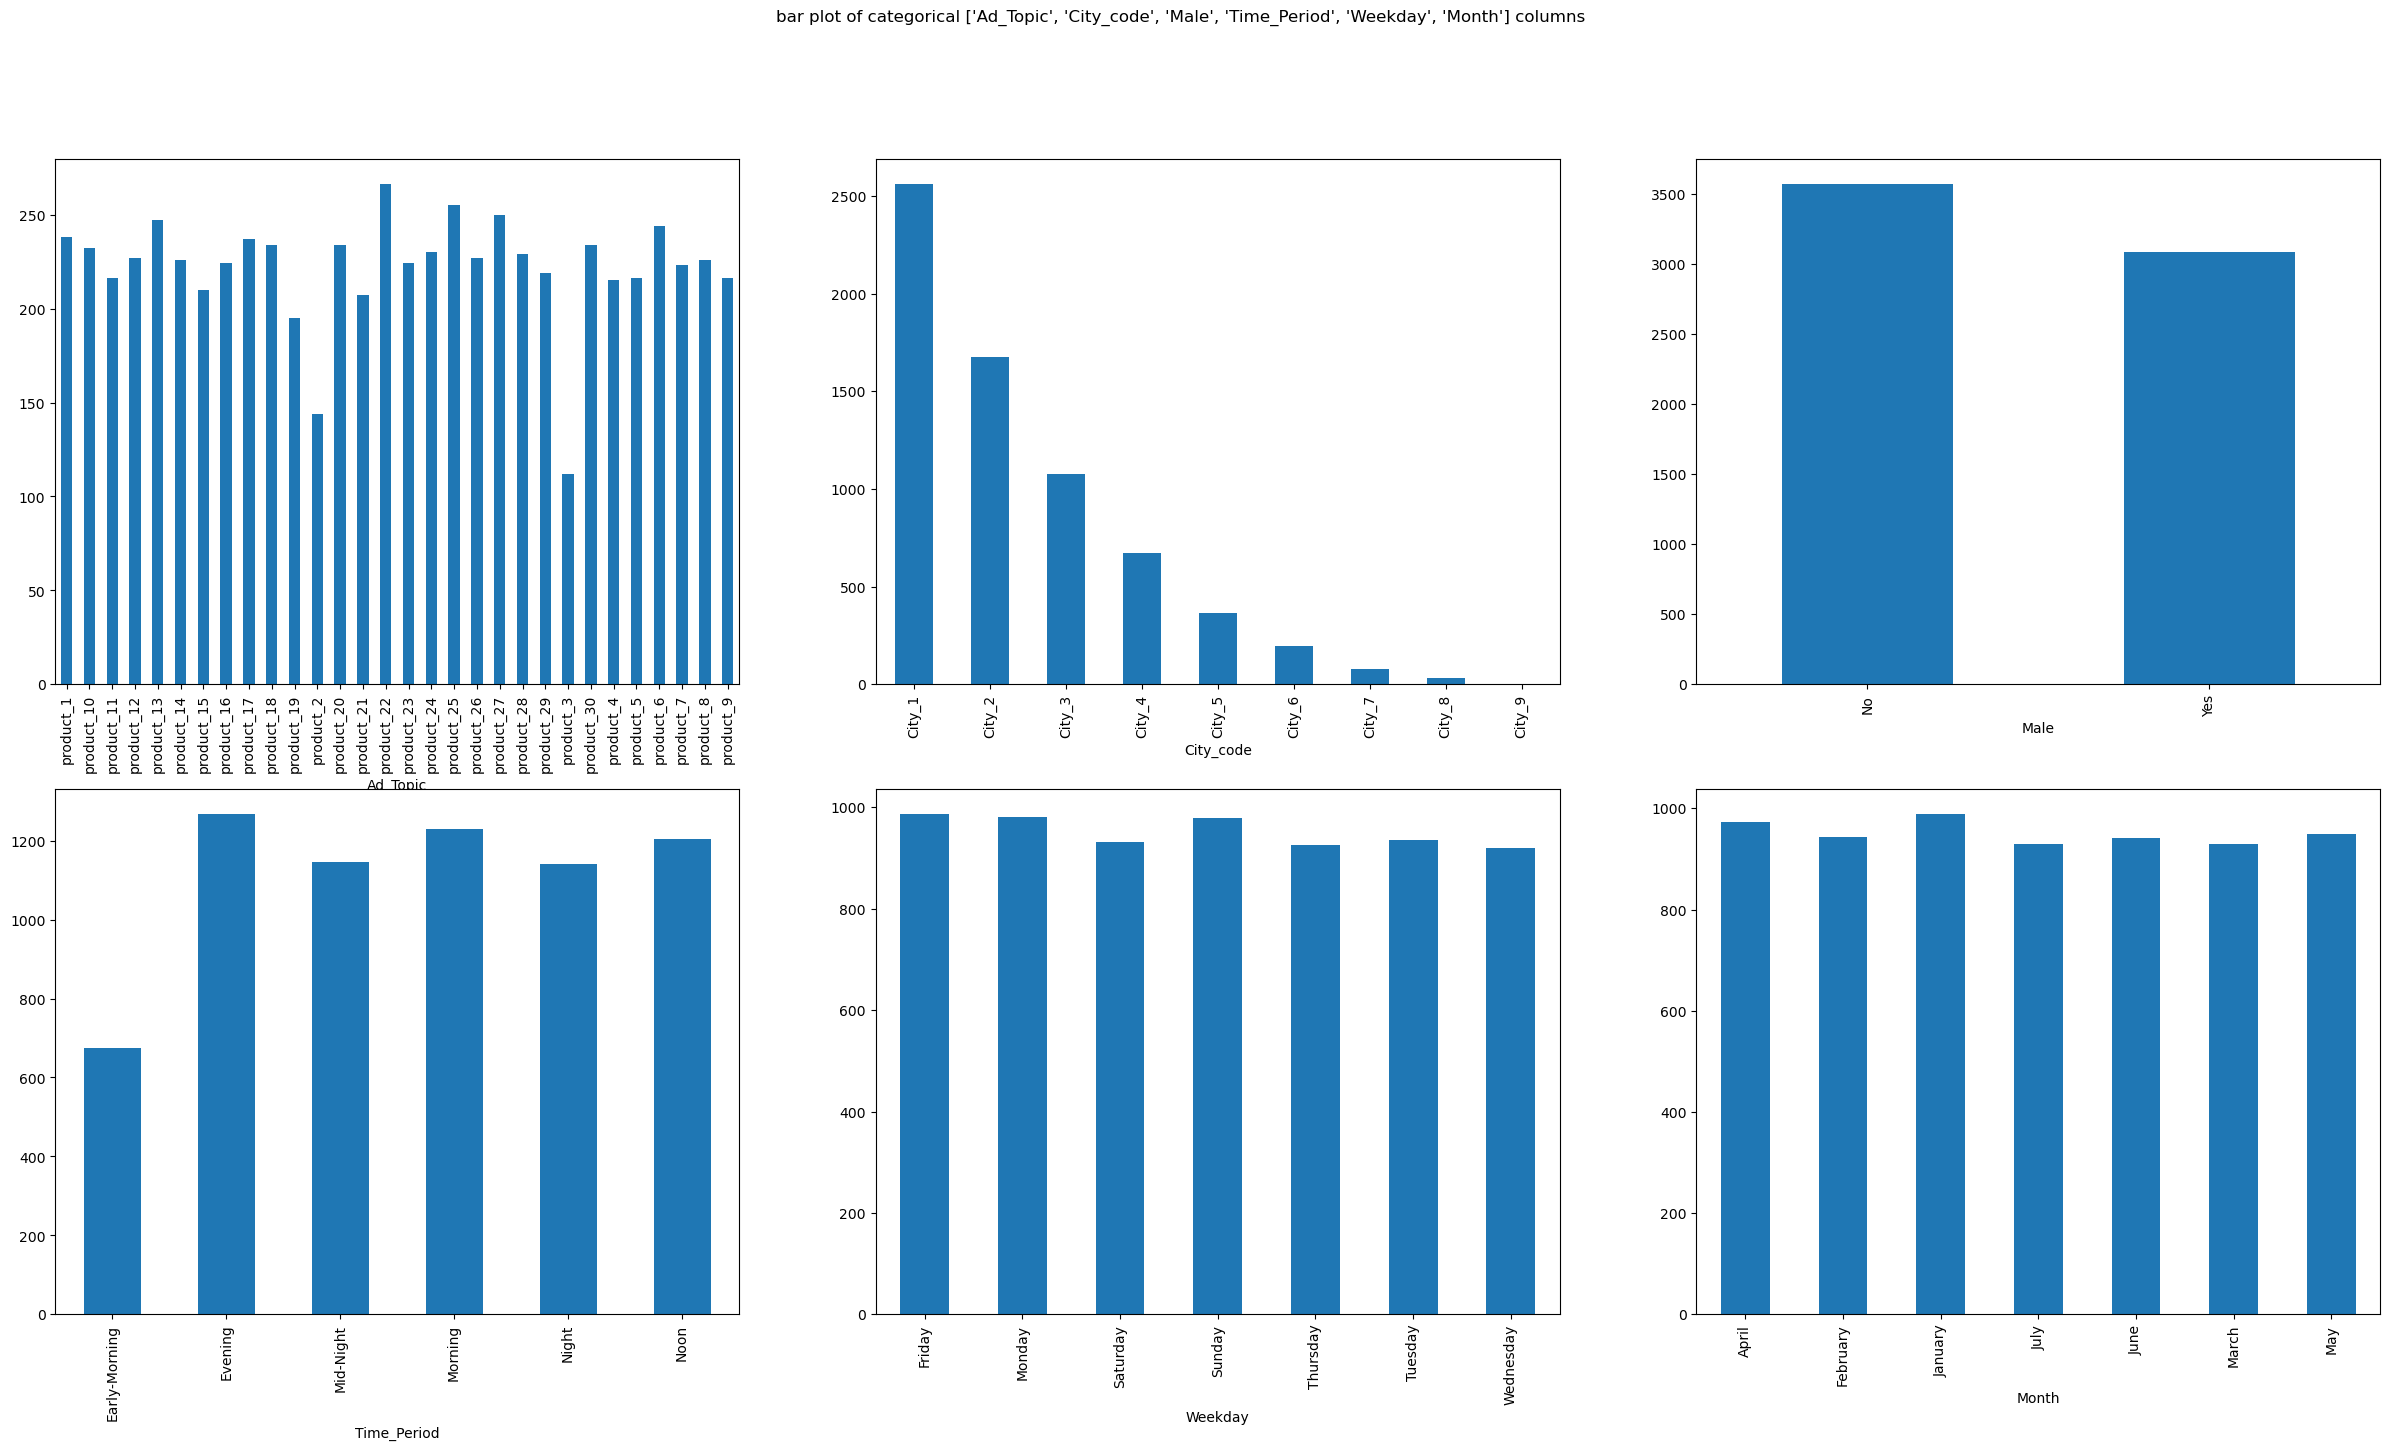

In [16]:
plotcategorical(df, ["Ad_Topic","City_code", "Male",
                     "Time_Period", "Weekday","Month"])

array([[<Axes: title={'center': 'Time_Spent'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Avg_Income'}>,
        <Axes: title={'center': 'Internet_Usage'}>]], dtype=object)

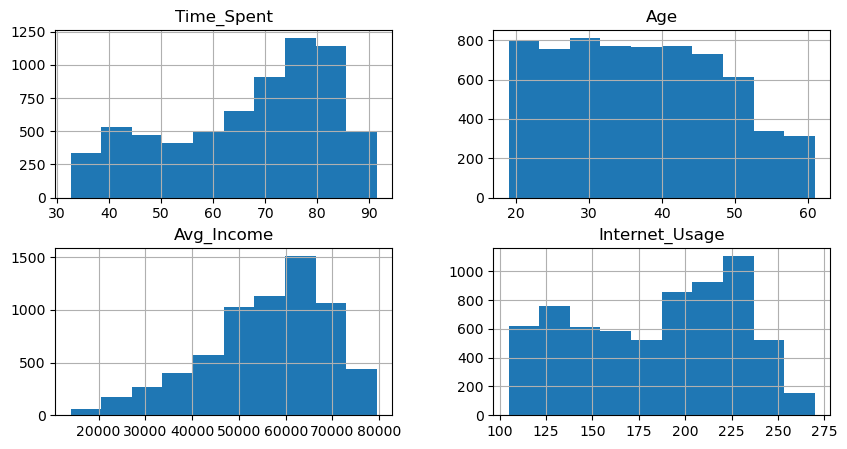

In [17]:
df.hist(["Time_Spent", "Age", "Avg_Income", "Internet_Usage"], figsize=(10,5))

In [18]:
## missing values check out 
df.isnull().sum()

Time_Spent        0
Age               0
Avg_Income        0
Internet_Usage    0
Ad_Topic          0
City_code         0
Male              0
Time_Period       0
Weekday           0
Month             0
Clicked           0
dtype: int64

Feature selection
=================
    Anova result: all four continuous predictors are correlated with the target variable
    chi_square result : Month categorical variable is not correlated with the target variable
    SelectedColumns: ["Time_Spent", "Age", "Avg_Income", "Internet_Usage",
                        "Ad_Topic", "City_code", "Male", "Time_Period"]


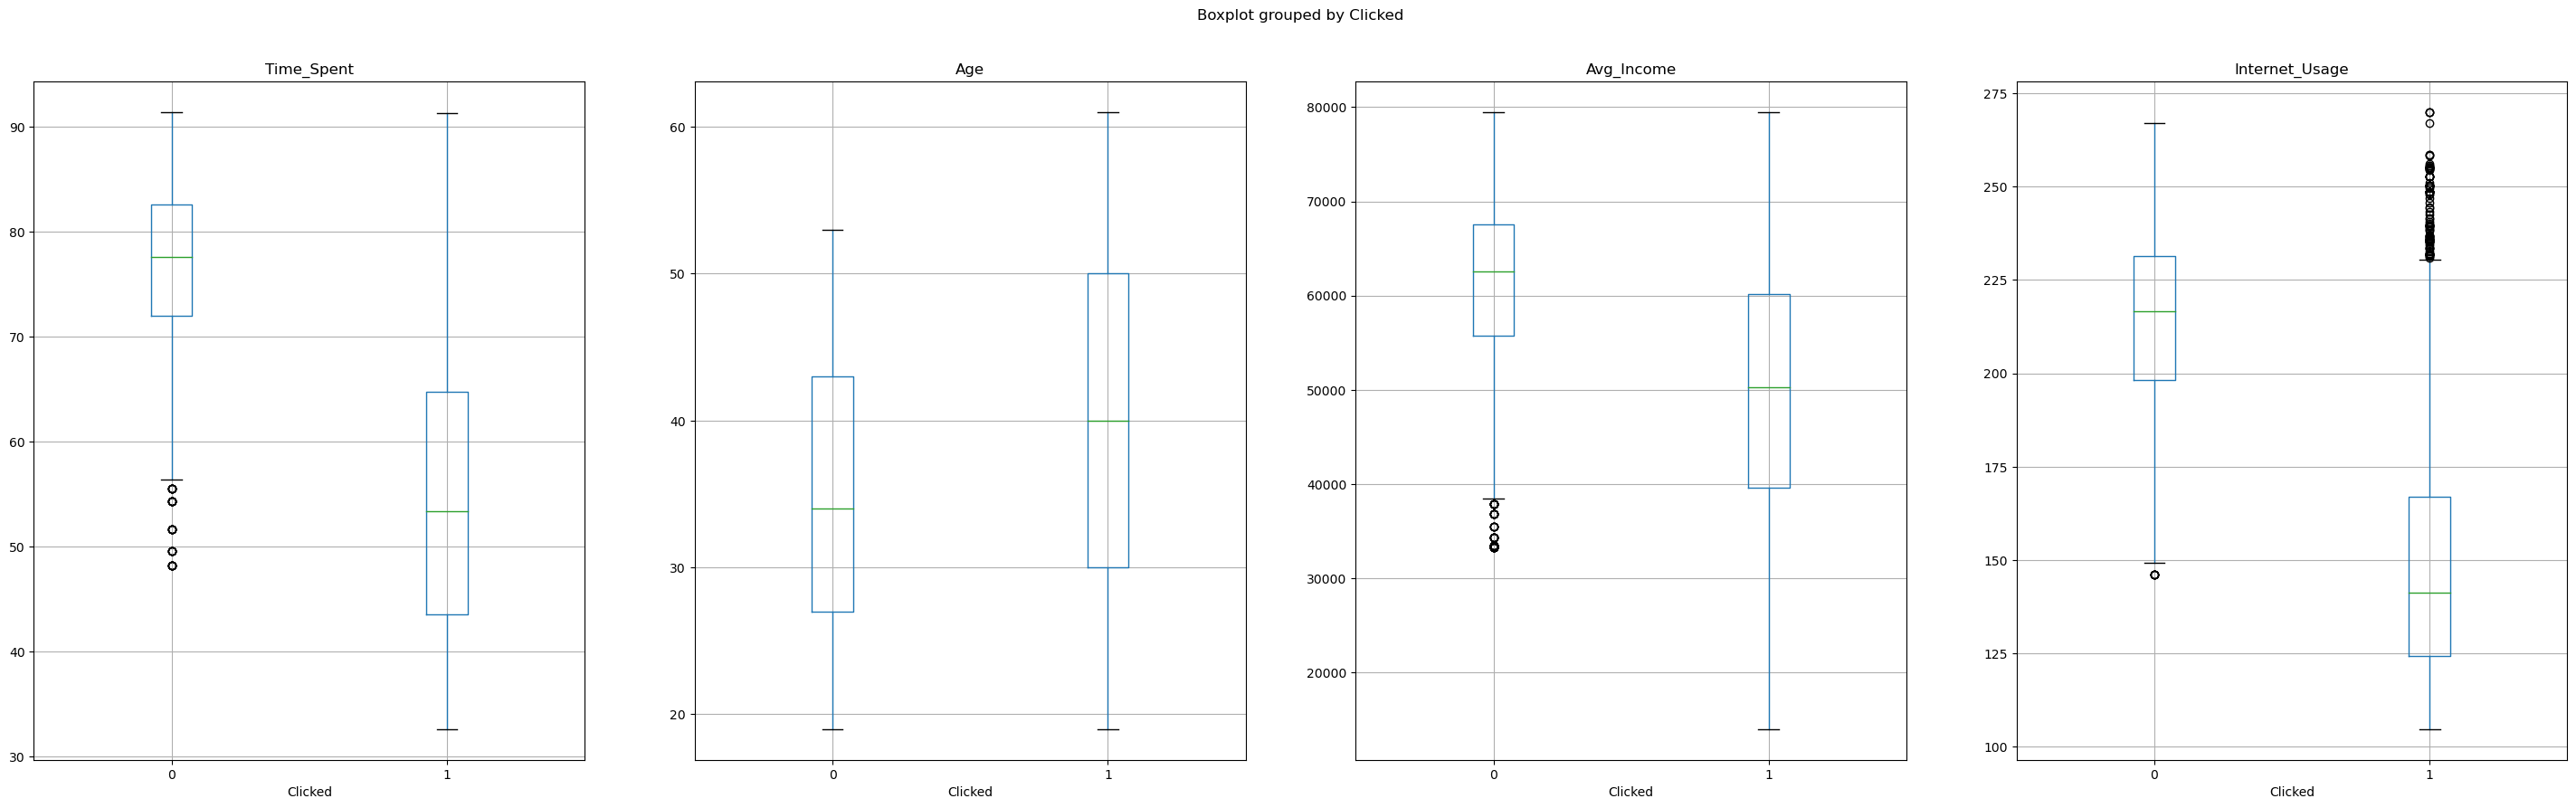

In [19]:
## boxplot b'w the categorical target variable [clicked] and rest of the contineous predictors
cont_columns = ["Time_Spent", "Age", "Avg_Income", "Internet_Usage"]
%matplotlib inline
fig, subplot = plt.subplots(nrows = 1, ncols = len(cont_columns), figsize = (35,10))
for i , col in enumerate(cont_columns):
    df.boxplot(column = col, by = 'Clicked', ax = subplot[i], figsize = (10,10), vert = True )


In [20]:
## Anova testing on the columns ["Time_Spent", "Age", "Avg_Income", "Internet_Usage"]
## Assumption(H0): There is NO relation between the given variables and target variable
def Function_Anova(input_data, predictor_col, target_col):
    """
    Function to perform Anova testing on the input data.
    :param input_data: data frame
    :param predictor_col: predictor column
    :param target_col: target column
    """

    from scipy.stats import f_oneway
    
    SelectedPredictors = []
    for predictor in predictor_col:
        CategoryGroupLists=input_data.groupby(target_col)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', target_col, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', target_col, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)




In [21]:
print(Function_Anova(df, ["Time_Spent", "Age", "Avg_Income", "Internet_Usage"], 'Clicked'))

Time_Spent is correlated with Clicked | P-Value: 0.0
Age is correlated with Clicked | P-Value: 6.40789044460054e-91
Avg_Income is correlated with Clicked | P-Value: 0.0
Internet_Usage is correlated with Clicked | P-Value: 0.0
['Time_Spent', 'Age', 'Avg_Income', 'Internet_Usage']


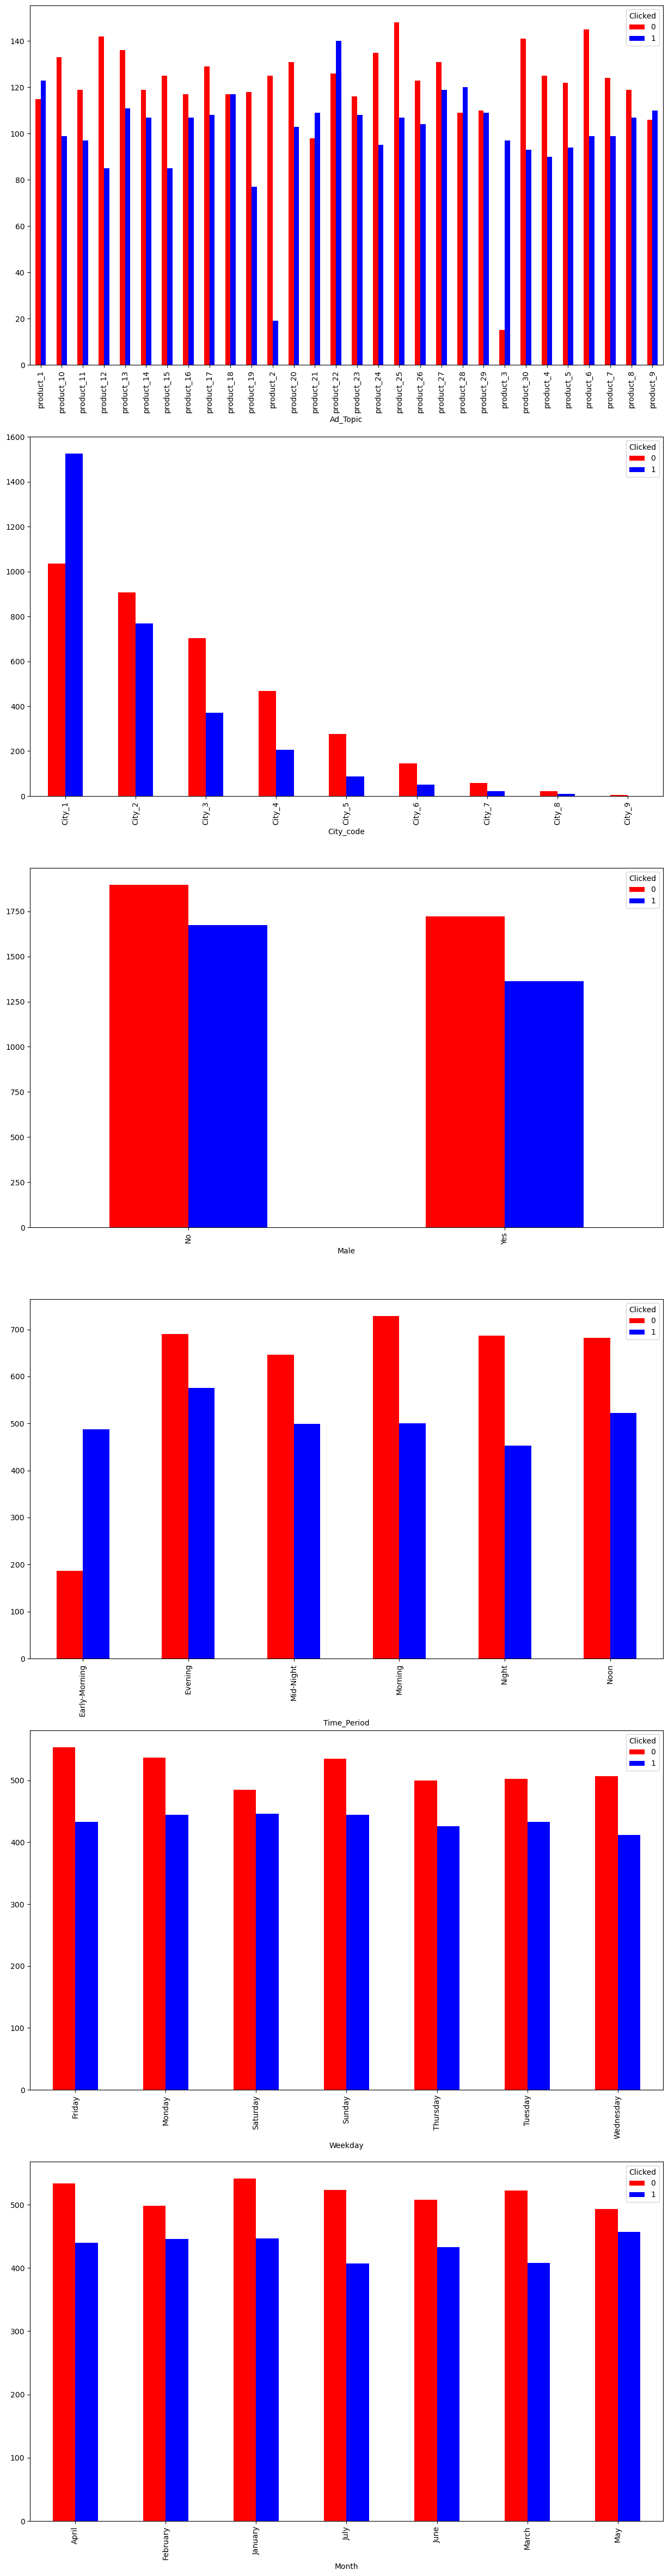

In [22]:
#Visual Inference using Grouped Bar charts
CategoricalColsList=["Ad_Topic","City_code", "Male",
                     "Time_Period", "Weekday","Month"]

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(15,60))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "Clicked"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=df[CategoricalCol], columns=df['Clicked'])
    CrossTabResult.plot.bar(color=['red','blue'], ax=PlotCanvas[i])


In [23]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [24]:
CategoricalVariables=["Ad_Topic","City_code", "Male",
                     "Time_Period", "Weekday","Month"]

# Calling the function
FunctionChisq(inpData=df, 
              TargetVariable='Clicked',
              CategoricalVariablesList= CategoricalVariables)

Ad_Topic is correlated with Clicked | P-Value: 1.2676573604736464e-24
City_code is correlated with Clicked | P-Value: 2.6667953391697526e-88
Male is correlated with Clicked | P-Value: 0.02695171301745074
Time_Period is correlated with Clicked | P-Value: 4.465745015735695e-47
Weekday is NOT correlated with Clicked | P-Value: 0.7226317326250824
Month is NOT correlated with Clicked | P-Value: 0.4229049097263303


['Ad_Topic', 'City_code', 'Male', 'Time_Period']

Selected predictors for ML model

SelectedColumns=["Time_Spent", "Age", "Avg_Income", "Internet_Usage",
                "Ad_Topic", "City_code", "Male", "Time_Period"]

In [26]:
SelectedColumns=["Time_Spent", "Age", "Avg_Income", "Internet_Usage",
                "Ad_Topic", "City_code", "Male", "Time_Period"]

# Selecting final columns
DataForML= df[SelectedColumns]
DataForML.head()

Time_Spent  Age  Avg_Income  Internet_Usage    Ad_Topic City_code Male  \
0       87.97   43    55901.12          185.46  product_11    City_5   No   
1       51.63   50    39132.00          176.73   product_8    City_1   No   
2       82.37   38    57032.36          210.60   product_6    City_2   No   
3       62.06   45    48868.00          190.05  product_19    City_3  Yes   
4       77.66   31    61608.23          204.86  product_11    City_2   No   

  Time_Period  
0   Mid-Night  
1     Evening  
2     Morning  
3     Morning  
4        Noon

Data pre-processing

In [31]:
## convert binary nominal column Male into numeri
DataForML['Male'].replace({'Yes':1, 'No':0}, inplace= True)

/tmp/ipykernel_759555/748528579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataForML['Male'].replace({'Yes':1, 'No':0}, inplace= True)


In [32]:
DataForML

Time_Spent  Age  Avg_Income  Internet_Usage    Ad_Topic City_code  Male  \
0          87.97   43    55901.12          185.46  product_11    City_5     0   
1          51.63   50    39132.00          176.73   product_8    City_1     0   
2          82.37   38    57032.36          210.60   product_6    City_2     0   
3          62.06   45    48868.00          190.05  product_19    City_3     1   
4          77.66   31    61608.23          204.86  product_11    City_2     0   
...          ...  ...         ...             ...         ...       ...   ...   
6652       69.08   23    57756.89          195.68  product_29    City_4     1   
6653       72.23   23    52968.22          247.90  product_25    City_5     1   
6654       57.20   56    24079.00          129.23  product_24    City_2     0   
6655       88.04   28    64188.50          241.03  product_18    City_7     1   
6656       68.01   20    59761.56          214.53  product_22    City_5     0   

     Time_Period  
0      Mid-Night  
1        Evening  
2        Morning  
3        Morning  
4           Noon  
...          ...  
6652       Night  
6653        Noon  
6654     Morning  
6655   Mid-Night  
6656       Night  

[6657 rows x 8 columns]

In [33]:
## converitng all nominal columns in to numeric columns using pd.get_dummies()
DataForML_Numeric = pd.get_dummies(DataForML)

## adding target column
DataForML_Numeric['Clicked'] = df['Clicked']

DataForML_Numeric.head()

Time_Spent  Age  Avg_Income  Internet_Usage  Male  Ad_Topic_product_1  \
0       87.97   43    55901.12          185.46     0                   0   
1       51.63   50    39132.00          176.73     0                   0   
2       82.37   38    57032.36          210.60     0                   0   
3       62.06   45    48868.00          190.05     1                   0   
4       77.66   31    61608.23          204.86     0                   0   

   Ad_Topic_product_10  Ad_Topic_product_11  Ad_Topic_product_12  \
0                    0                    1                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    1                    0   

   Ad_Topic_product_13  ...  City_code_City_7  City_code_City_8  \
0                    0  ...                 0                 0   
1                    0  ...                 0                 0   
2                    0  ...                 0                 0   
3                    0  ...                 0                 0   
4                    0  ...                 0                 0   

   City_code_City_9  Time_Period_Early-Morning  Time_Period_Evening  \
0                 0                          0                    0   
1                 0                          0                    1   
2                 0                          0                    0   
3                 0                          0                    0   
4                 0                          0                    0   

   Time_Period_Mid-Night  Time_Period_Morning  Time_Period_Night  \
0                      1                    0                  0   
1                      0                    0                  0   
2                      0                    1                  0   
3                      0                    1                  0   
4                      0                    0                  0   

   Time_Period_Noon  Clicked  
0                 0        0  
1                 0        1  
2                 0        0  
3                 0        1  
4                 1        0  

[5 rows x 51 columns]

In [52]:
predictors = DataForML_Numeric.columns[:-1].values.tolist()
target = "Clicked"
# len(predictors)

50

In [50]:
## split the data into training and testing

## convert the dataframe into numpy arrays

X, y = DataForML_Numeric[predictors].values, DataForML_Numeric[target].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
## normalisation and standardisation
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 456)


In [59]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4659, 50)
(1998, 50)
(4659,)
(1998,)


Logistic Regression

In [60]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1107
           1       0.95      0.90      0.92       891

    accuracy                           0.93      1998
   macro avg       0.93      0.93      0.93      1998
weighted avg       0.93      0.93      0.93      1998

[[1061   46]
 [  93  798]]
Accuracy of the model on Testing Sample Data: 0.93

Accuracy values for 10-fold Cross Validation:
 [0.93693694 0.88773764 0.92472202 0.93975226 0.92611277 0.94273948
 0.94273948 0.94280626 0.93519986 0.93517856]

Final Average Accuracy of the model: 0.93


Decision tree

DecisionTreeClassifier(criterion='entropy', max_depth=2)
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1107
           1       0.87      0.91      0.89       891

    accuracy                           0.90      1998
   macro avg       0.90      0.90      0.90      1998
weighted avg       0.90      0.90      0.90      1998

[[981 126]
 [ 77 814]]
Accuracy of the model on Testing Sample Data: 0.9

Accuracy values for 10-fold Cross Validation:
 [0.92022157 0.88081772 0.87852085 0.92454929 0.91859248 0.90248142
 0.89802557 0.93671902 0.92588299 0.90685001]

Final Average Accuracy of the model: 0.91


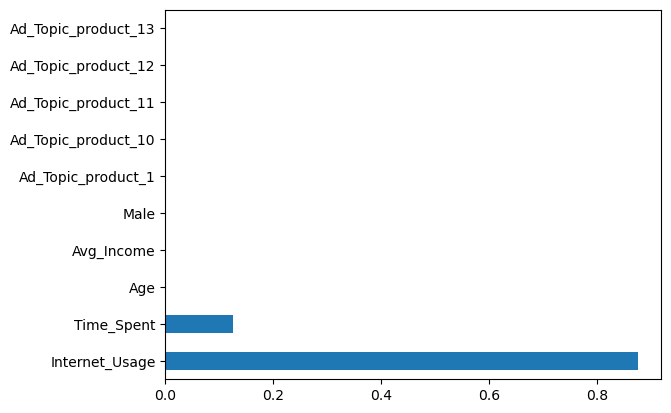

In [64]:
#Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=2,criterion='entropy')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))